<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/perfectdatacodes/gbr_extraremoved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
from glob import glob

files = glob('FLX*')

dataframes = []

columns_to_read = ["SW_IN_F","LW_IN_F", "PA_F", "WS_F", "VPD_F", "temperature_2m", "total_precipitation_sum", "LE_CORR"]

for file in files:
    df = pd.read_excel(file, usecols=columns_to_read, header=0)  # Replace read_excel with the appropriate function for your file format
    dataframes.append(df)

# Concatenate all the DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Now you can use the combined_df DataFrame for further analysis or processing

combined_df


,SW_IN_F,LW_IN_F,VPD_F,PA_F,WS_F,LE_CORR,temperature_2m,total_precipitation_sum
0,103.330,295.435,0.803,99.659,1.033,14.0894,279.555888,8.320000e-05
1,120.125,272.751,1.355,100.435,1.093,20.2355,278.457296,5.820000e-04
2,116.812,284.339,2.715,100.976,0.823,18.9021,278.608387,4.410000e-07
3,37.592,309.736,1.482,100.996,0.680,13.4714,279.167382,1.650000e-04
4,123.604,264.920,4.161,100.458,1.685,19.5968,280.145327,3.000000e-06
...,...,...,...,...,...,...,...,...
17525,96.744,257.042,1.750,102.643,0.971,29.0690,280.321662,0.000000e+00
17526,117.460,268.529,2.464,102.492,0.638,29.7458,280.833206,8.550000e-07
17527,65.695,276.439,1.255,102.092,1.195,23.5720,280.310670,9.610000e-05
17528,133.985,237.433,4.854,102.059,7.740,46.6856,280.379863,1.010000e-05


In [195]:
count_9999 = (combined_df["LE_CORR"] == -9999).sum()
print("Number of values with -9999 in LE_CORR:", count_9999)


Number of values with -9999 in LE_CORR: 121


In [196]:
combined_df = combined_df[combined_df["LE_CORR"] != -9999]


In [197]:
combined_df.shape

(17409, 8)

In [198]:
import numpy as np
def normalization(x):
    x= (x-min(x)) / (max(x) - min(x))
    return x

In [199]:
data_all = np.array(combined_df)

In [200]:
X = combined_df.drop("LE_CORR", axis=1)
y = combined_df["LE_CORR"]
X.shape

(17409, 7)

In [201]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Scale the X DataFrame
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

In [202]:
import numpy as np
import matplotlib.pyplot as plt

In [203]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [204]:
kf = KFold(n_splits=15)
for train, test in kf.split(X_scaled):
    X_train, X_test, y_train, y_test = np.array(X_scaled)[train], np.array(X_scaled)[test], np.array(y_scaled)[train], np.array(y_scaled)[test]
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    tree1 = DecisionTreeRegressor(max_depth=8)
    tree2 = RandomForestRegressor(max_depth=12)
    tree1.fit(X_train, y_train)
    tree2.fit(X_train, y_train)
    y_pred1 = tree1.predict(X_test)
    y_pred2 = tree2.predict(X_test)

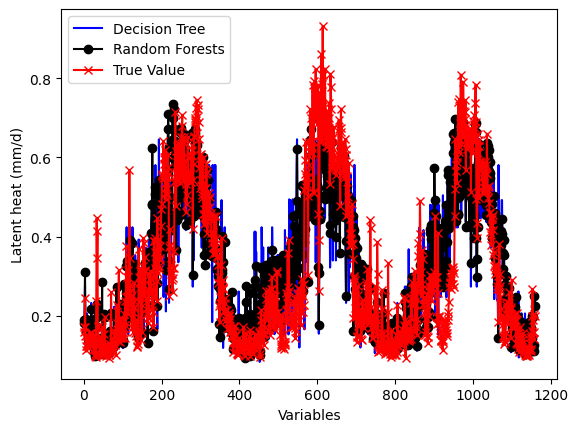

In [205]:
# plot the data
# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line = ax.plot( y_pred1, c='b',label='Decision Tree')
plt.plot( y_pred2, marker='o', c='black',label='Random Forests')
plt.plot( y_test, marker='x', c='r',label='True Value')
# Set the y-axis label
plt.ylabel('Latent heat (mm/d)')
# Set the x-axis label
plt.xlabel('Variables')
plt.legend()
plt.show()

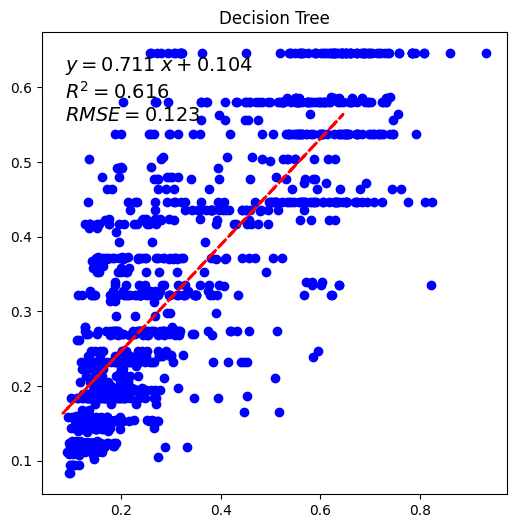

In [206]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred1, c='b')
z = np.polyfit(y_test , y_pred1, 1)
y_hat = np.poly1d(z)(y_pred1)
plt.plot(y_pred1, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.title('Decision Tree')
plt.show()

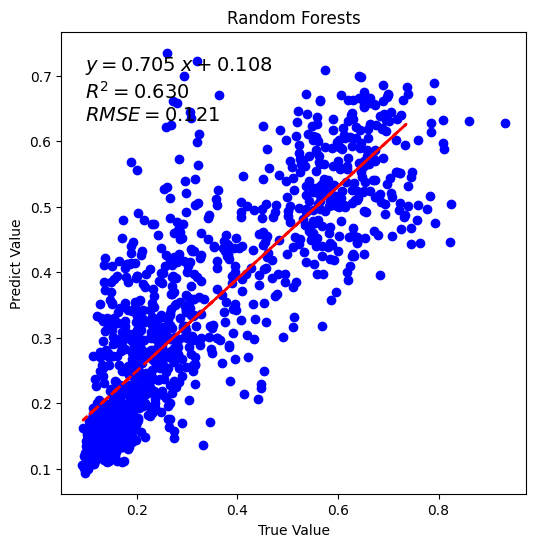

In [207]:
fig,ax=plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter( y_test , y_pred2, c='b')
z = np.polyfit(y_test , y_pred2, 1)
y_hat = np.poly1d(z)(y_pred2)
plt.plot(y_pred2, y_hat, "r--", lw=2)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y_test, y_hat):0.3f}$\n" \
                   f"$RMSE = {mean_squared_error(y_test, y_hat, squared=False):0.3f} $ "
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
                           fontsize=14, verticalalignment='top')
plt.ylabel('Predict Value')
# Set the x-axis label
plt.xlabel('True Value')
plt.title('Random Forests')
plt.show()

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [209]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [210]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
reg = ensemble.GradientBoostingRegressor(**params)
y_tr = y_tr.ravel()
reg.fit(X_tr, y_tr)
mse = mean_squared_error(y_tst, reg.predict(X_tst))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0049


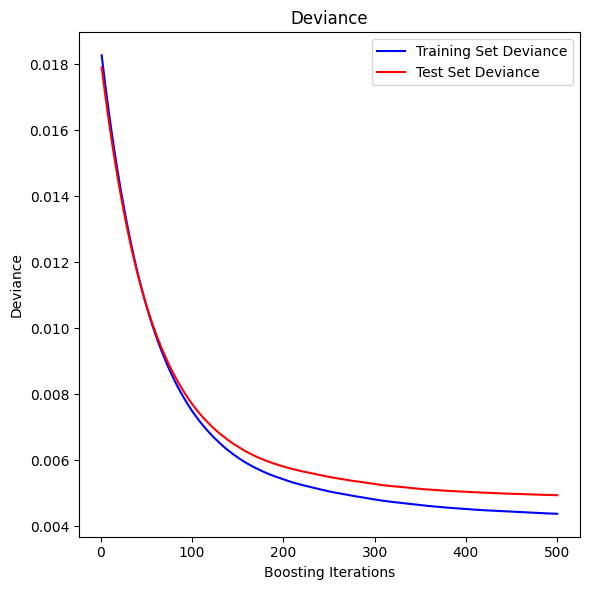

In [211]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_tst)):
    test_score[i] = mean_squared_error(y_tst, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

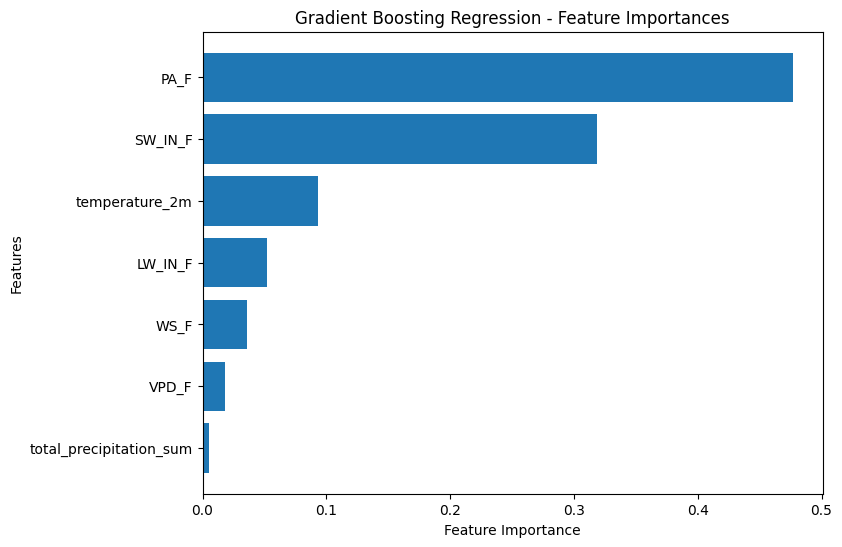

In [212]:
# Step 4: Retrieve the Feature Importances
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Step 5: Plot the Feature Importances
plt.figure(figsize=(8, 6))
plt.barh(range(X.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regression - Feature Importances')
plt.show()

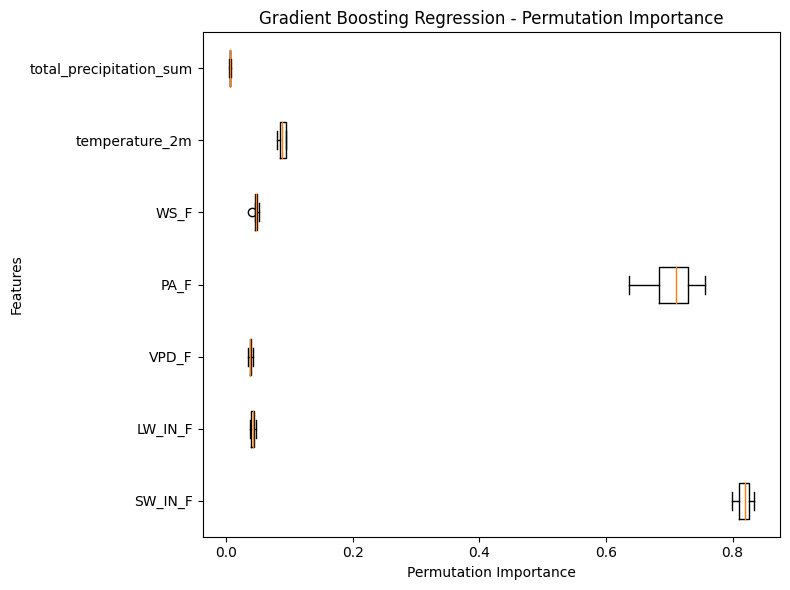

In [213]:
perm_importance = permutation_importance(reg, X_tst, y_tst, n_repeats=10, random_state=42)

# Step 5: Get the Feature Importance Scores
importance_scores = perm_importance.importances.T

# Step 6: Plot the Box Plot for Permutation Importance
plt.figure(figsize=(8, 6))
plt.boxplot(importance_scores, vert=False)
plt.yticks(range(1, X.shape[1] + 1), X.columns)
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regression - Permutation Importance')
plt.tight_layout()
plt.show()

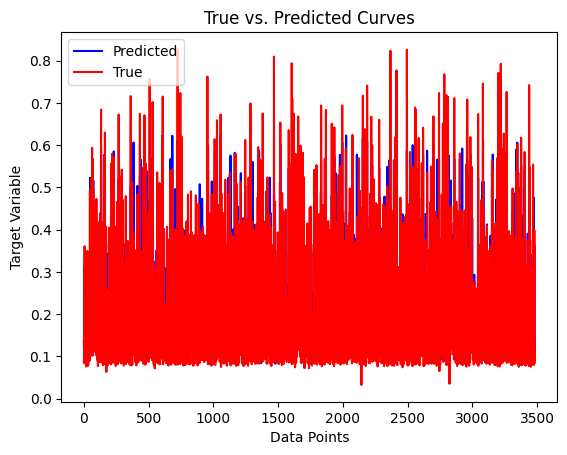

In [214]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(y_pred, c='b', label='Predicted')
ax.plot(y_tst, c='r', label='True')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.title('True vs. Predicted Curves')
plt.show()

In [215]:
y_tst

array([[0.08604106],
       [0.08908192],
       [0.093204  ],
       ...,
       [0.30873695],
       [0.08456466],
       [0.10802999]])

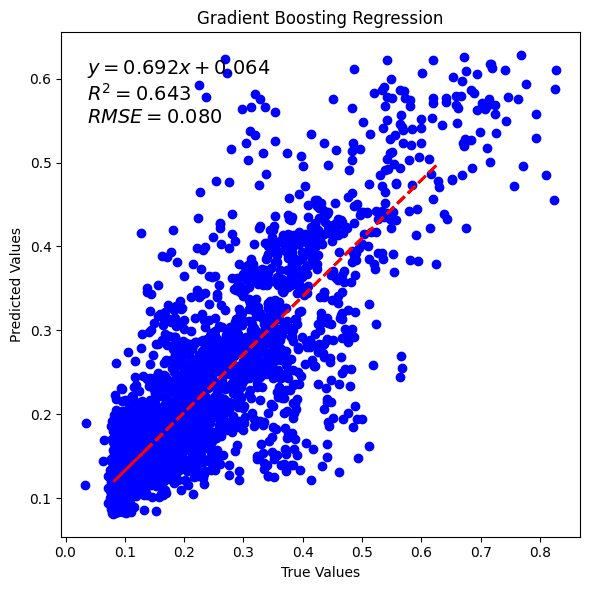

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), sharey=True)
ax.scatter(y_tst.flatten(), y_pred, c='b')

# Polynomial Fit Line
z = np.polyfit(y_tst.flatten(), y_pred, 1)
poly_fit = np.poly1d(z)
y_hat = poly_fit(y_pred)
plt.plot(y_pred, y_hat, "r--", lw=2)
text = f"$y = {z[0]:0.3f}x {z[1]:+0.3f}$\n$R^2 = {r2_score(y_tst.flatten(), y_hat):0.3f}$\n" \
       f"$RMSE = {mean_squared_error(y_tst.flatten(), y_hat, squared=False):0.3f}$"
plt.gca().text(0.05, 0.95, text, transform=plt.gca().transAxes,
               fontsize=14, verticalalignment='top')

plt.title('Gradient Boosting Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()  # Adjust the layout

plt.show()



Support vector regression

In [217]:
from sklearn.svm import SVR
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
y_tr = y_tr.ravel()
y_tst = y_tst.flatten()
rbf_fit = svr_rbf.fit(X_tr, y_tr)
poly_fit = svr_poly.fit(X_tr, y_tr)


In [243]:
ypre_poly = svr_poly.predict(X_tst)
ypre_rbf = svr_rbf.predict(X_tst)
mse_rbf = mean_squared_error(y_tst, ypre_rbf)
mse_poly = mean_squared_error(y_tst, ypre_poly)
print(mse_rbf)
print(mse_poly)

0.0073444286252842385
0.007178954763048446


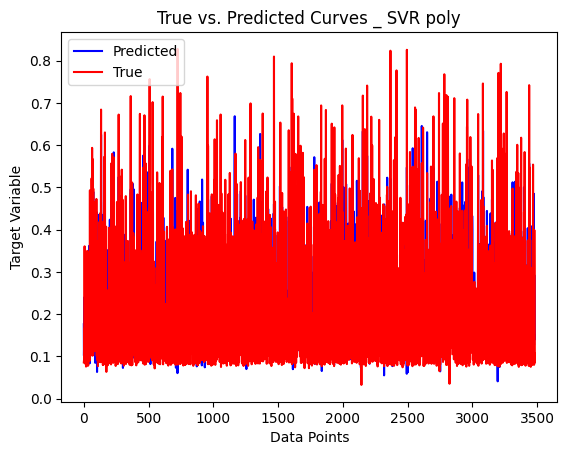

In [221]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ypre_poly, c='b', label='Predicted')
ax.plot(y_tst, c='r', label='True')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.title('True vs. Predicted Curves _ SVR poly')
plt.show()

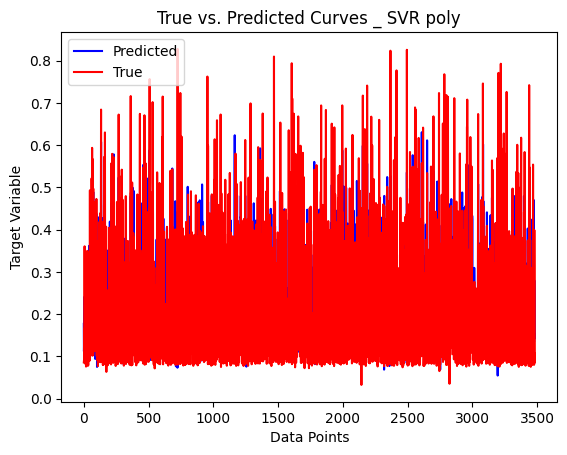

In [222]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ypre_rbf, c='b', label='Predicted')
ax.plot(y_tst, c='r', label='True')
plt.xlabel('Data Points')
plt.ylabel('Target Variable')
plt.legend()
plt.title('True vs. Predicted Curves _ SVR poly')
plt.show()